CM2607 - Advanced Mathematics For Data Science - Part 01: Individual Assignment

Agampodi Mindiya De Zoysa

IIT - 20231603

RGU - 2330949

In [120]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import cv2
from mpl_toolkits.mplot3d import Axes3D
from scipy.fftpack import fft2, fftshift, ifft2, dct, idct
from skimage import io, color

Question 1

(a)

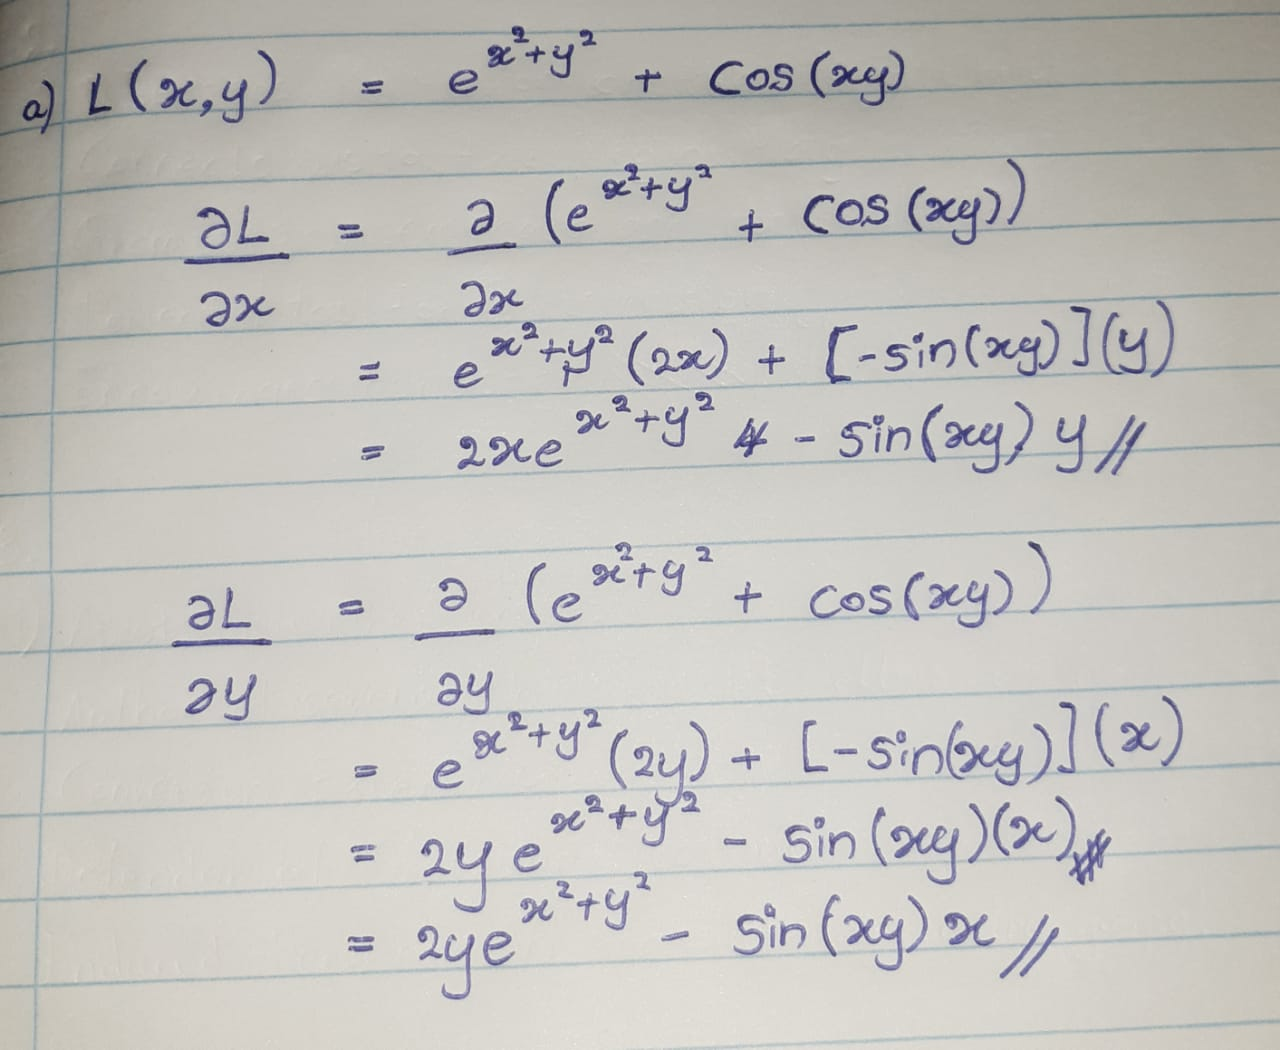

(b)

In [121]:
# Define symbols for symbolic differentiation
x, y = sp.symbols('x y')
L = sp.exp(x**2 + y**2) + sp.cos(x * y)

# Compute partial derivatives
Lx = sp.diff(L, x)
Ly = sp.diff(L, y)

# Convert partial derivatives into Python functions
grad_Lx = sp.lambdify((x, y), Lx, "numpy")
grad_Ly = sp.lambdify((x, y), Ly, "numpy")

# Define a Python function to compute the gradient vector
def gradient(x_val, y_val):
    return np.array([grad_Lx(x_val, y_val), grad_Ly(x_val, y_val)])

(c)

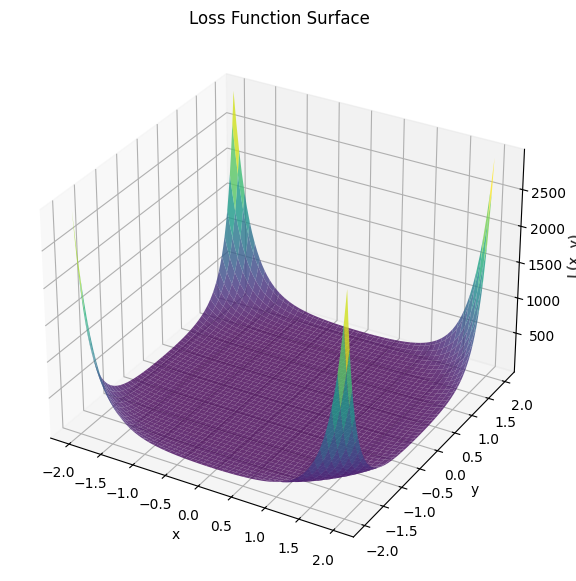

In [122]:
# Visualization of the Loss Function
# Define the loss function as a Python function
loss_func = sp.lambdify((x, y), L, "numpy")

# Generate a mesh grid for visualization
X = np.linspace(-2, 2, 100)
Y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(X, Y)
Z = loss_func(X, Y)

# Plot the loss function
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_title("Loss Function Surface")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("L(x, y)")
plt.show()

(d)

Gradient descent in model enhancement aims to minimize the cost function by decreasing the gaps between estimates and reality which in turn raises the prediction rate of the machine learning model. At any point, the gradient vector points in the direction of the steepest increase of the loss function. The negative gradient determines the direction of the parameter update such that the loss function gets smaller during the course of model training. This way, the model constantly travels in the direction of lower loss by correcting its parameters until the error becomes minimal and the performance as well as accuracy of the model is at its highest level.

Question 2

(a)

In [123]:
# Define the variable and function for symbolic computation
t = sp.symbols('t')
A_t = 2 * t**2 * sp.exp(-t)

# Compute the definite integral using SymPy
integral_value = sp.integrate(A_t, (t, 0, 4))
print(f"Definite Integral ∫₀⁴ 2t²e⁻ᵗ dt = {integral_value}")
print(f"Definite Integral ∫₀⁴ 2t²e⁻ᵗ dt = {float(integral_value):.4f}")

Definite Integral ∫₀⁴ 2t²e⁻ᵗ dt = 4 - 52*exp(-4)
Definite Integral ∫₀⁴ 2t²e⁻ᵗ dt = 3.0476


(b)

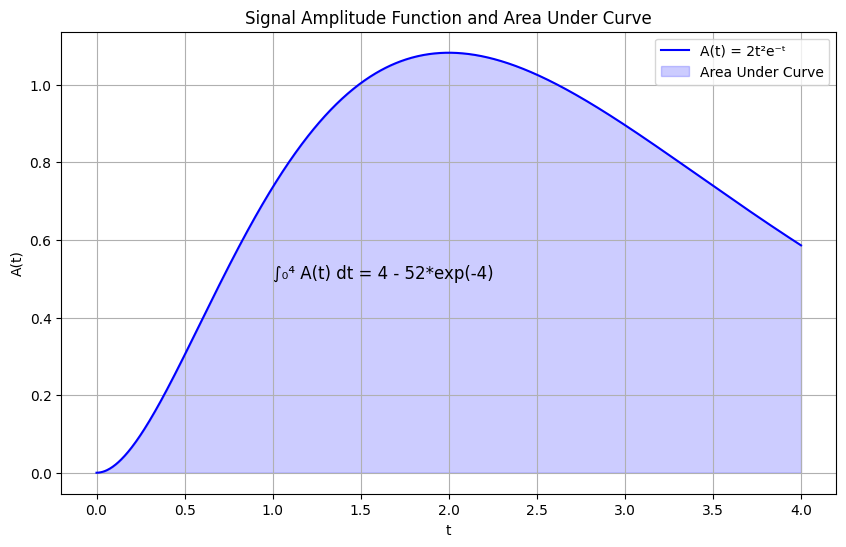

In [124]:
# Plot the function and annotate the area under the curve
# Define the function as a Python lambda for numerical computation
A_t_func = lambda t: 2 * t**2 * np.exp(-t)

# Generate data points for plotting
t_vals = np.linspace(0, 4, 1000)
A_vals = A_t_func(t_vals)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(t_vals, A_vals, label="A(t) = 2t²e⁻ᵗ", color='blue')
plt.fill_between(t_vals, A_vals, alpha=0.2, color='blue', label="Area Under Curve")

# Labels and showing the grid plan
plt.title("Signal Amplitude Function and Area Under Curve")
plt.xlabel("t")
plt.ylabel("A(t)")
plt.legend()
plt.grid()

# Annotate the graph with the integral value
plt.text(1, 0.5, f"∫₀⁴ A(t) dt = {integral_value}", fontsize=12, color='black')

# Display the output
plt.show()

(c)

The energy of a signal is calculated by integrating the square of the amplitude over a period of time. The computed integral gives us a measure of how much energy that signal contains, where energy reflects the strength of transmitted signals. In this context, amplitude of the signal is given by the formula A(t) = 2(t^2)exp(-t). The computed integral of A(t) is regarded as the signal total energy in the interval of [0, 4].

Question 3

(a)


In [125]:
# Define the series approximation for ln(1 + x)
def ln_series(x, terms=10):
    approx = np.zeros_like(x)
    for n in range(1, terms + 1):
        approx += (-1)**(n + 1) * (x**n) / n
    return approx

(b)

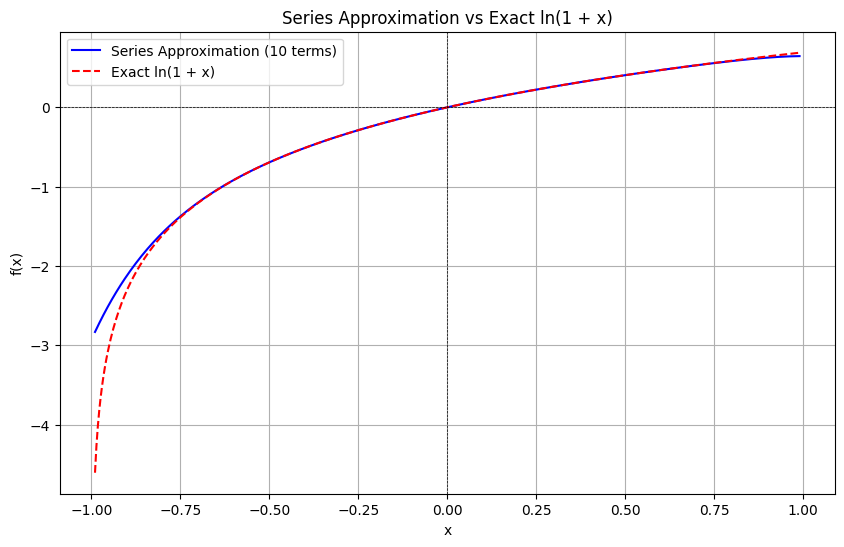

In [126]:
# Define the exact function
def ln_exact(x):
    return np.log(1 + x)

# Generate data points for x in [-1, 1]
x_vals = np.linspace(-0.99, 0.99, 500)  # Avoid -1 to prevent log(0)
approx_ln = ln_series(x_vals, terms=10)
exact_ln = ln_exact(x_vals)

# Plot the series approximation vs. exact function
plt.figure(figsize=(10, 6))
plt.plot(x_vals, approx_ln, label="Series Approximation (10 terms)", color='blue')
plt.plot(x_vals, exact_ln, label="Exact ln(1 + x)", color='red', linestyle='--')
plt.title("Series Approximation vs Exact ln(1 + x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()

(c)

Convergence of the series \( ln(1 + x) \) is dependent on the real value of \( x \). For smaller \( x \)-values around zero, the series convergence is towards zero quite rapidly because the terms are decreasing in absolute value on an ever faster rate. On the other hand, for large \( x \) closer to 1, the speed of convergence becomes rather sluggish due to the fact that the significant terms have not been exhausted and a large number of terms would be required to significantly decrease the error.

Question 4

(a)

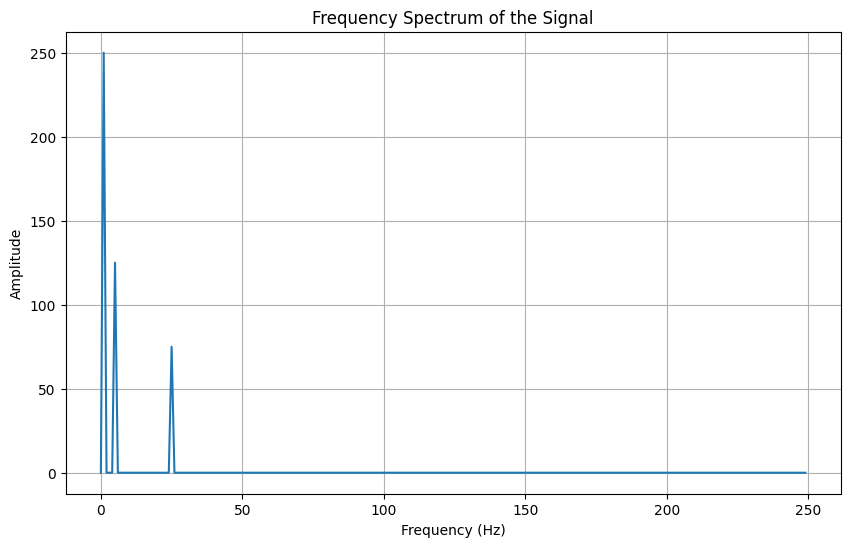

In [127]:
# Define the signal
# Sampling parameters
fs = 500  # Sampling frequency in Hz
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector from 0 to 1 second
signal = np.sin(2 * np.pi * t) + 0.5 * np.sin(10 * np.pi * t) + 0.3 * np.sin(50 * np.pi * t)

# Perform Fourier Transform
freqs = fftfreq(fs, 1/fs)  # Frequency bins
fft_signal = fft(signal)   # Fourier Transform of the signal

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(freqs[:fs//2], np.abs(fft_signal)[:fs//2])  # Plot only positive frequencies
plt.title("Frequency Spectrum of the Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

(b)

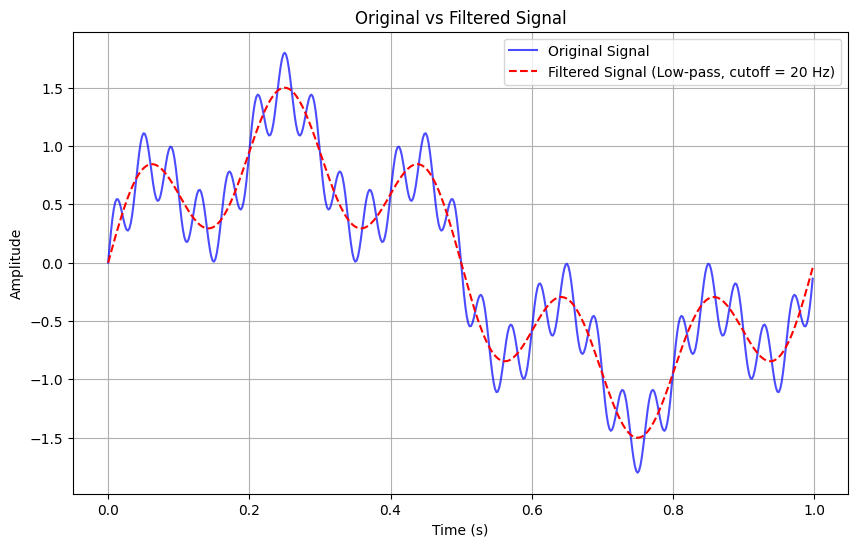

In [128]:
# Design and apply a low-pass filter
# Define the cutoff frequency
cutoff_freq = 20  # Hz
fft_signal_filtered = fft_signal.copy()
fft_signal_filtered[np.abs(freqs) > cutoff_freq] = 0  # Zero out frequencies above cutoff

# Perform inverse Fourier Transform to get the filtered signal
filtered_signal = np.real(ifft(fft_signal_filtered))

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label="Original Signal", color='blue', alpha=0.7)
plt.plot(t, filtered_signal, label="Filtered Signal (Low-pass, cutoff = 20 Hz)", color='red', linestyle='--')
plt.title("Original vs Filtered Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

(c)

Filtering improves signal quality by accentuating some frequency components while suppressing others. In most cases filtering in data science is applied for interference removal. As for instance, a low pass filter removes high frequency noise components from audio recordings while allowing low frequency sound to be kept and disturbances to the expected signal to be removed. This improves the quality for recognition tasks, such as speech, music and other sound processing tasks.

Question 5

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


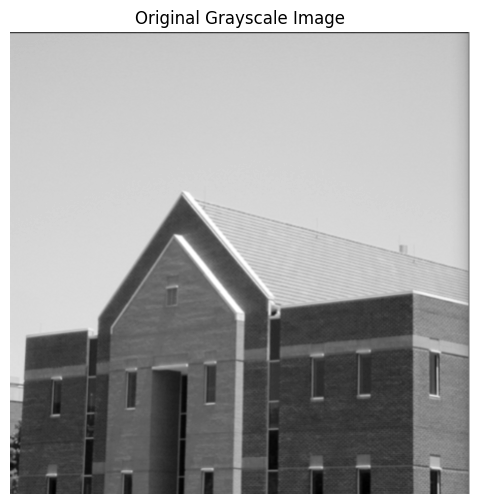

In [130]:
# Define the path to the image
image_file_path = "/content/drive/MyDrive/Maths/Image.png"

# Load the image as a grayscale image
grayscale_image = cv2.imread(image_file_path, cv2.IMREAD_GRAYSCALE)

# Display the original grayscale image for reference
plt.figure(figsize=(6, 6))
plt.title("Original Grayscale Image")
plt.imshow(grayscale_image, cmap='gray')
plt.axis("off")
plt.show()

(a)

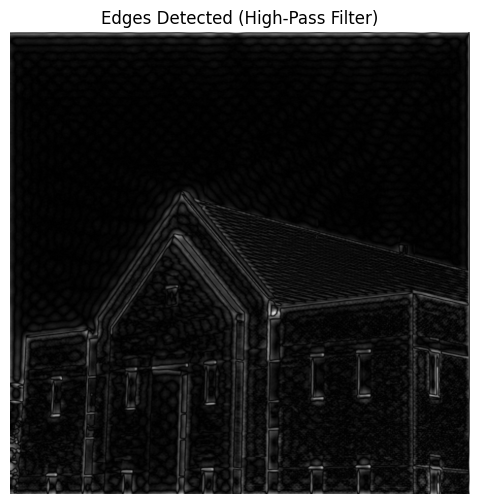

In [131]:
# Perform the 2D Fourier Transform on the image
fourier_transform = fft2(grayscale_image)

# Shift the zero-frequency component to the center
centered_transform = fftshift(fourier_transform)

# Create a high-pass filter mask
image_rows, image_cols = grayscale_image.shape
center_row, center_col = image_rows // 2, image_cols // 2
high_pass_mask = np.ones((image_rows, image_cols), dtype=np.float32)

# Define the radius for the high-pass filter
filter_radius = 30

# Set a circular region in the mask to 0 (for high-pass filtering)
cv2.circle(high_pass_mask, (center_col, center_row), filter_radius, 0, -1)

# Apply the high-pass filter in the Fourier domain
filtered_transform = centered_transform * high_pass_mask

# Perform the inverse Fourier Transform to reconstruct the edges
inverse_centered_transform = np.fft.ifftshift(filtered_transform)
detected_edges = np.abs(ifft2(inverse_centered_transform))

# Display the detected edges
plt.figure(figsize=(6, 6))
plt.title("Edges Detected (High-Pass Filter)")
plt.imshow(detected_edges, cmap='gray')
plt.axis("off")
plt.show()

(b)

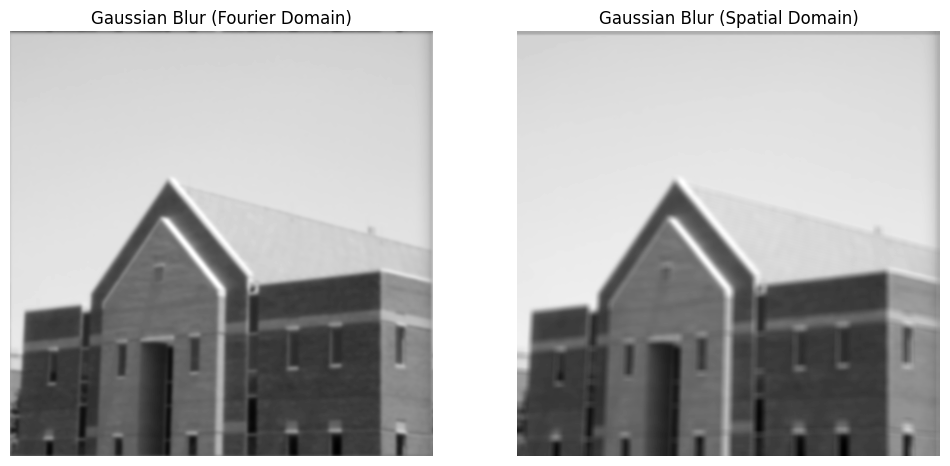

In [132]:
# Create a Gaussian filter in the frequency domain
frequency_x = np.linspace(-0.5, 0.5, image_cols)
frequency_y = np.linspace(-0.5, 0.5, image_rows)
mesh_x, mesh_y = np.meshgrid(frequency_x, frequency_y)

# Define the standard deviation for the Gaussian filter
gaussian_sigma = 0.05
frequency_gaussian_filter = np.exp(-(mesh_x**2 + mesh_y**2) / (2 * gaussian_sigma**2))

# Apply the Gaussian filter in the Fourier domain
blurred_frequency_transform = centered_transform * frequency_gaussian_filter

# Perform the inverse Fourier Transform to get the blurred image
inverse_blurred_transform = np.fft.ifftshift(blurred_frequency_transform)
fourier_blurred_image = np.abs(ifft2(inverse_blurred_transform))

# Apply a standard Gaussian blur in the spatial domain
spatial_blurred_image = cv2.GaussianBlur(grayscale_image, (15, 15), sigmaX=10)

# Display the results for comparison
plt.figure(figsize=(12, 6))

# Display the Fourier domain blurred image
plt.subplot(1, 2, 1)
plt.title("Gaussian Blur (Fourier Domain)")
plt.imshow(fourier_blurred_image, cmap='gray')
plt.axis("off")

# Display the spatial domain blurred image
plt.subplot(1, 2, 2)
plt.title("Gaussian Blur (Spatial Domain)")
plt.imshow(spatial_blurred_image, cmap='gray')
plt.axis("off")

plt.show()

(c)

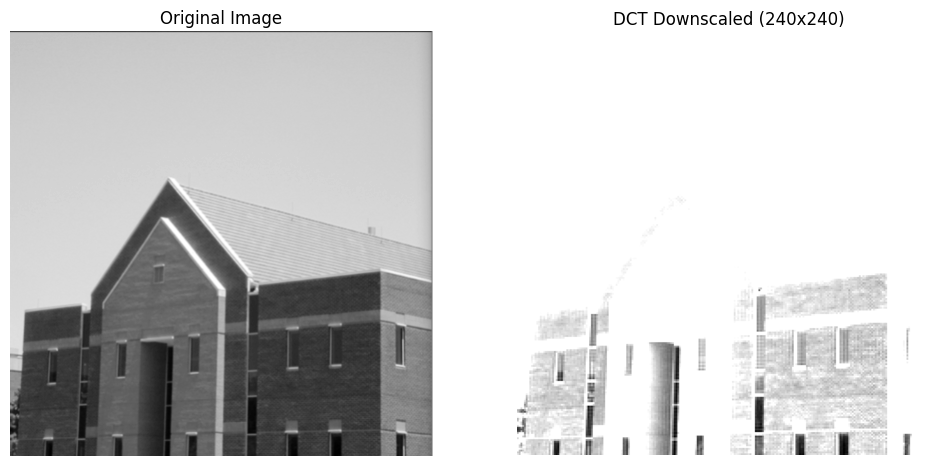

In [133]:
# Apply 2D Discrete Cosine Transform (DCT) to the image
dct_coefficients = dct(dct(grayscale_image.T, norm='ortho').T, norm='ortho')

# Scale down the image to 240px x 240px using DCT coefficients
downscaled_size = 240
downscaled_dct = dct_coefficients[:downscaled_size, :downscaled_size]

# Perform the inverse DCT to reconstruct the downscaled image
reconstructed_image = idct(idct(downscaled_dct.T, norm='ortho').T, norm='ortho')

# Normalize the reconstructed image to the range [0, 255] for visualization
reconstructed_image_normalized = np.clip(reconstructed_image, 0, 255).astype(np.uint8)

# Display the results
plt.figure(figsize=(12, 6))

# Show the original image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(grayscale_image, cmap='gray')
plt.axis("off")

# Show the downscaled image using DCT
plt.subplot(1, 2, 2)
plt.title("DCT Downscaled (240x240)")
plt.imshow(reconstructed_image_normalized, cmap='gray')
plt.axis("off")

plt.show()

(d)

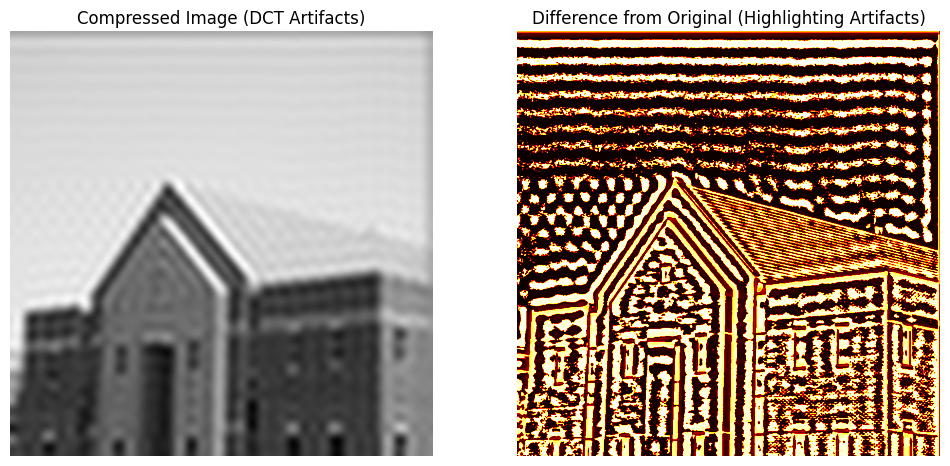

In [134]:
# Apply aggressive DCT compression by keeping only a small number of coefficients
compression_factor = 50
dct_compressed_coefficients = np.zeros_like(dct_coefficients)
dct_compressed_coefficients[:compression_factor, :compression_factor] = dct_coefficients[:compression_factor, :compression_factor]

# Reconstruct the image from the compressed DCT coefficients
compressed_reconstructed_image = idct(idct(dct_compressed_coefficients.T, norm='ortho').T, norm='ortho')
compressed_image_normalized = np.clip(compressed_reconstructed_image, 0, 255).astype(np.uint8)

# Visualize the artifacts (ringing and blocking)
plt.figure(figsize=(12, 6))

# Display the compressed image with DCT artifacts
plt.subplot(1, 2, 1)
plt.title("Compressed Image (DCT Artifacts)")
plt.imshow(compressed_image_normalized, cmap='gray')
plt.axis("off")

# Display the difference between the original and compressed image (highlighting artifacts)
plt.subplot(1, 2, 2)
plt.title("Difference from Original (Highlighting Artifacts)")
artifact_difference = np.abs(grayscale_image - compressed_image_normalized)
plt.imshow(artifact_difference, cmap='hot')
plt.axis("off")

plt.show()
